
<h1><center>This Notebook Contains Time Series Data Analysis cum Visualization </center></h1>
<center>In this data project, the focus is on exploratory data analysis and visualization of stock prices.</center>

<div class="alert alert-block alert-info" style="margin-top: 10px">

1. [<h3>Data Loading</h3>](#1)
2. [<h3>Exploratory Data Analysis and Visualization</h3>](#2)
3. [<h3>Interactive Visualization</h3>](#3)

</div>
<hr>

### Importing libraries

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()

<h1> <center>Data Loading</center> </h1><a id="1"></a>

Getting data using pandas datareader for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Getting the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.916302
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.938789


In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

Could also do this for a Panel Object

In [6]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  35.298687  445.561951  107.575417  27.529718  37.758644   
2006-01-04  34.923801  437.335999  106.089539  27.370821  37.784546   
2006-01-05  34.968796  439.505585  106.047821  27.453718  37.888165   
2006-01-06  34.916302  439.505585  107.550362  27.647156  37.927017   
2006-01-09  34.938789  437.426453  108.844261  28.096193  38.328484   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.823185  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.581659  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.558811  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.679575  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.676311  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143100.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370200.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680700.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

<h1> <center>Exploratory Data Analysis and Visualization</center> </h1><a id="2"></a>

Finding max Close price for each bank's stock throughout the time period?

In [7]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value.

In [9]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Create a pairplot using seaborn of the returns dataframe.

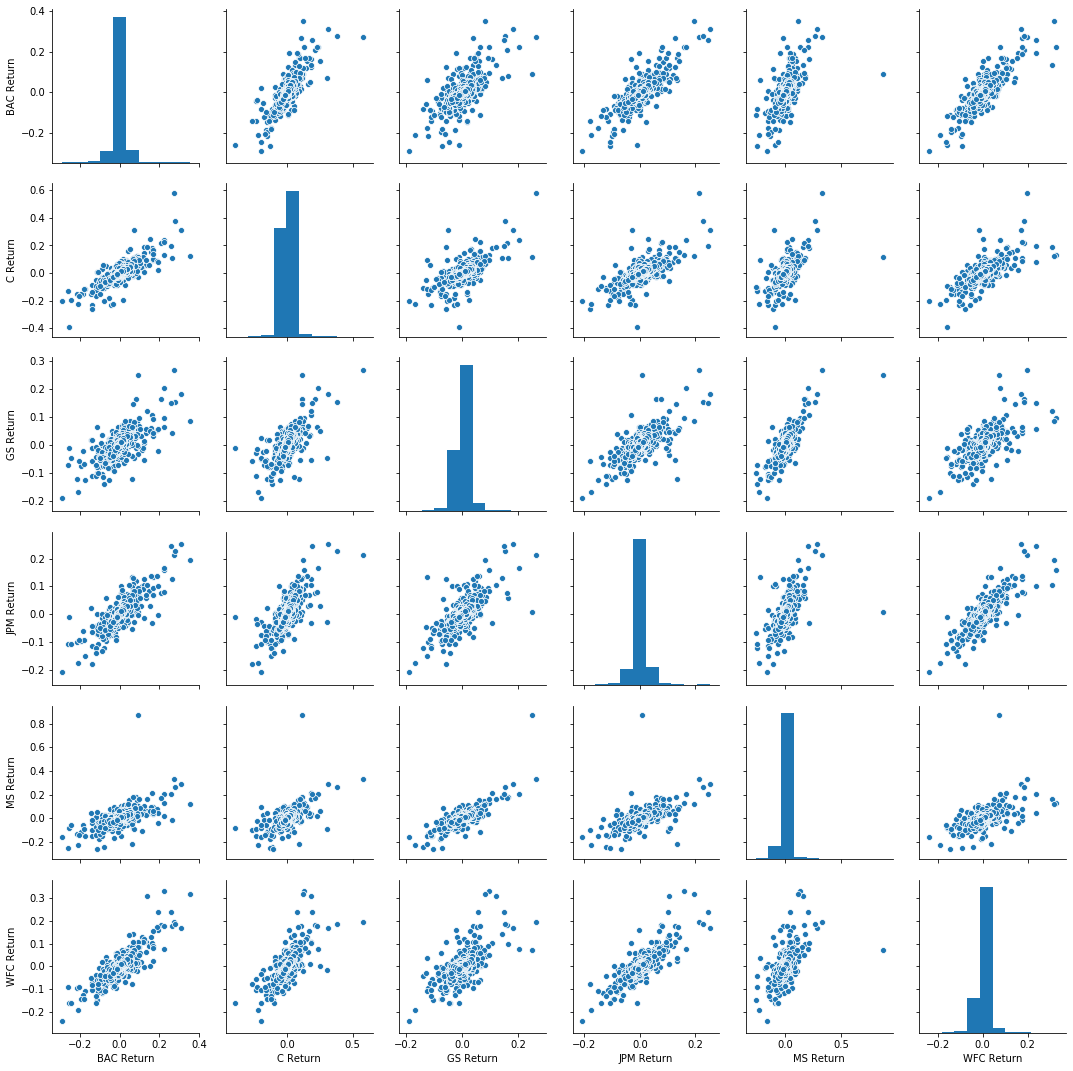

In [10]:
sns.pairplot(returns[1:])

Finding out on what dates each bank stock had the best and worst single day returns.

In [11]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [12]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Take standard deviation of the returns to determine which stock are the riskiest over the entire time period

In [13]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

Take standard deviation of the returns to determine which stock are the riskiest over the specific time period

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Creating a distplot using seaborn of the 2015 returns for Morgan Stanley

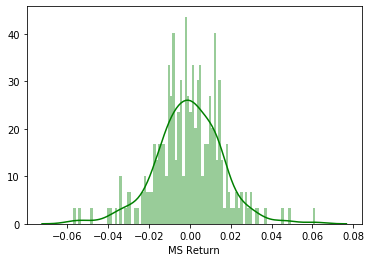

In [15]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

Creating a distplot using seaborn of the 2008 returns for CitiGroup

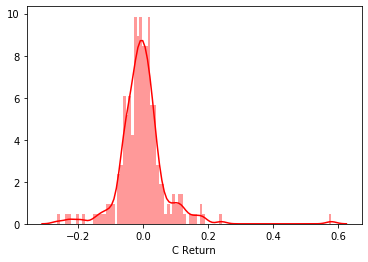

In [16]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

Creating a line plot showing Close price for each bank for the entire index of time.

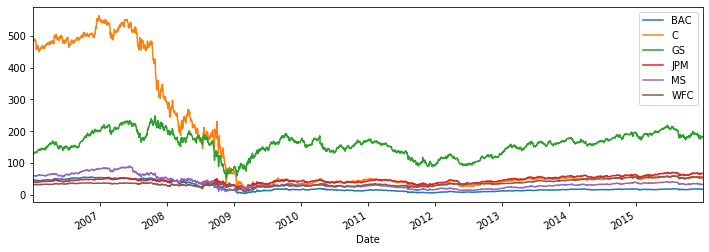

In [17]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

Another way of creating the same plot

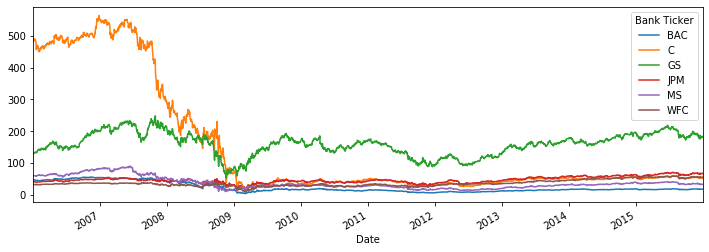

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

Another way of creating same plot using plotly for better interaction

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

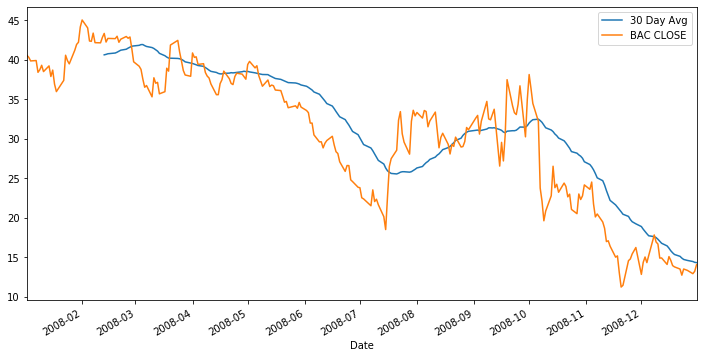

In [20]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

Creating a heatmap of the correlation between the stocks Close Price.

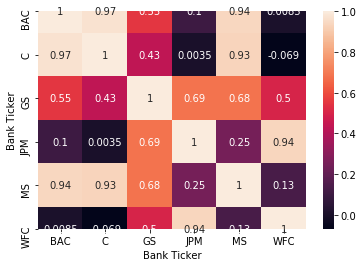

In [21]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Using seaborn's clustermap to cluster the correlations together.

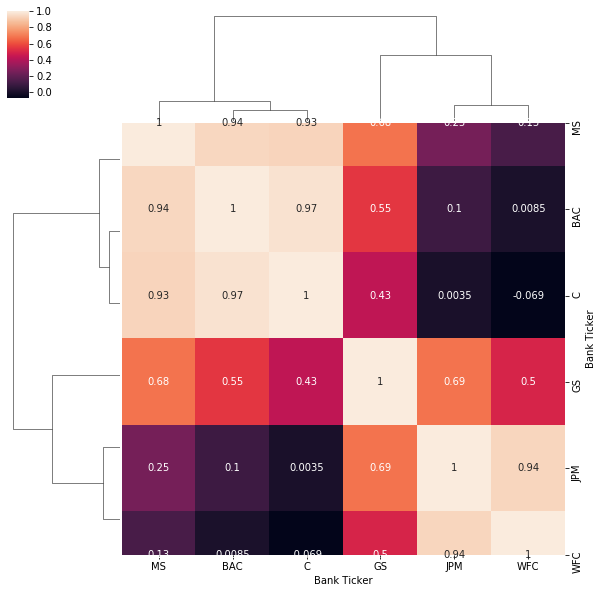

In [22]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

<h1> <center>Interactive Visualizations</center> </h1><a id="3"></a>

Creating interactive heatmap

In [23]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

Using .iplot(kind='candle) **which works because of cufflinks 'a wrapper'** to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [24]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [25]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

In [26]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')